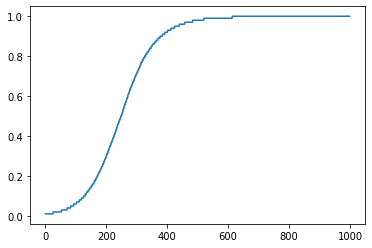

In [27]:
import numpy as np
import matplotlib.pyplot as plt

LOG_FILE = "log/Sim_Aug-23-2021-14-09-23.log"
CSV_FILE = "data/data_Aug-23-2021-14-09-23_n-0.03_.csv"

file = open(LOG_FILE).readlines()
array = [float(line) for line in file[1:]]

plt.plot(array)

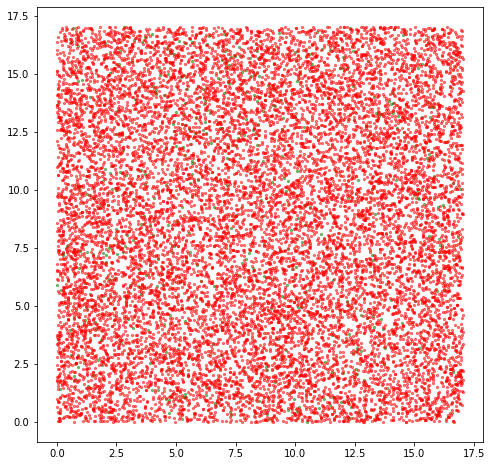

In [28]:
import pandas as pd

df = pd.read_csv(CSV_FILE)

# add figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

cellsx = df["locx"][df["state"] == True]
cellsy = df["locy"][df["state"] == True]
emptyx = df["locx"][df["state"] == False]
emptyy = df["locy"][df["state"] == False]

ax.scatter(cellsx, cellsy, color='green', s=5, alpha=0.5)
ax.scatter(emptyx, emptyy, color='red', s=5, alpha=0.5)

In [29]:
df

,Unnamed: 0,state,locx,locy,gain-r-0.95,r-0.95,gain-r-1.43,r-1.43,gain-r-1.90,r-1.90,...,gain-r-3.33,r-3.33,gain-r-3.81,r-3.81,gain-r-4.29,r-4.29,gain-r-4.76,r-4.76,gain-r-5.24,r-5.24
0,0,False,9.349976,12.184473,0.022556,0.022556,0.012475,0.035032,0.011264,0.046296,...,0.000014,0.033860,-0.002531,0.031329,0.004481,0.035811,-0.001357,0.034454,-0.000233,0.034221
1,1,False,10.269104,9.283016,0.032258,0.032258,-0.011487,0.020772,0.008897,0.029668,...,-0.000634,0.020955,0.002383,0.023338,-0.000114,0.023224,0.000071,0.023295,0.001473,0.024767
2,2,False,7.217683,11.003910,0.046154,0.046154,-0.014000,0.032154,0.014109,0.046263,...,-0.000705,0.041714,-0.001626,0.040088,-0.000735,0.039353,-0.000298,0.039056,0.000509,0.039565
3,3,False,7.455046,15.192877,0.097561,0.097561,-0.027533,0.070028,-0.014384,0.055644,...,0.003495,0.059740,-0.005329,0.054411,-0.003310,0.051101,-0.004504,0.046598,-0.002056,0.044542
4,4,False,16.417641,6.532581,0.013889,0.013889,0.004293,0.018182,-0.001594,0.016588,...,0.001202,0.015539,0.003857,0.019397,0.000638,0.020034,-0.001516,0.018519,0.001640,0.020158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,False,6.661082,13.015926,0.073826,0.073826,-0.000792,0.073034,-0.001847,0.071186,...,-0.007758,0.054505,-0.003965,0.050540,-0.004675,0.045865,-0.003947,0.041918,-0.002355,0.039563
14996,14996,False,15.104929,9.117869,0.042553,0.042553,-0.010853,0.031700,-0.004628,0.027073,...,-0.003503,0.019320,-0.002416,0.016904,-0.000072,0.016832,0.002469,0.019301,0.001716,0.021016
14997,14997,False,13.975689,10.602952,0.006410,0.006410,0.014300,0.020710,0.004890,0.025600,...,-0.000952,0.019518,0.000537,0.020055,0.000491,0.020545,-0.001321,0.019225,0.000813,0.020037
14998,14998,False,9.048885,14.530680,0.056962,0.056962,-0.002017,0.054945,-0.005345,0.049600,...,0.001763,0.043684,-0.001839,0.041845,-0.000477,0.041368,0.000478,0.041847,-0.001414,0.040433


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier as RF


columns = [item for item in df.columns[1:] if 'gain' in item]
data = df[columns]
targets = df["state"]

X_train, X_test, y_train, y_test = train_test_split(
    data, targets, random_state=100)

n_est = 100
model = RF(n_estimators=n_est).fit(X_train, y_train)

# output
print("Trained Random Forest with n_est=%d." % n_est)
print("--- Test Sample Size: \t %d" % y_test.size)
print("--- Train Sample Size: \t %d" % y_train.size)
print("\n--> Score: \t %.2f" % model.score(X_test, y_test))

# calculate importances
imp = permutation_importance(
    model, X_test, y_test,
    n_repeats=10, random_state=100, scoring='roc_auc')


Trained Random Forest with n_est=100.
--- Test Sample Size: 	 3750
--- Train Sample Size: 	 11250

--> Score: 	 0.97



-----------------------
Fit:
--> r0 = 0.751 +\- 0.200
--> a = 0.228 +\- 0.096


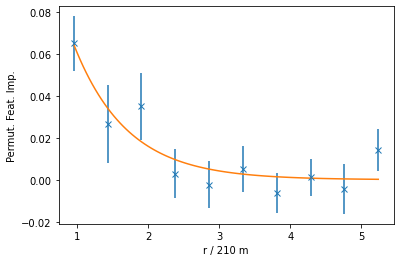

In [31]:
from numpy import array, inf, exp
from scipy.optimize import curve_fit

def model(x, a, r0):
    return a * exp(- x / r0)

mean = imp.importances_mean
std = imp.importances_std

# plot result
fig = plt.figure()

labels = [float(txt.split('gain-r-')[-1]) for txt in columns]
plt.errorbar(labels, mean, yerr=std, fmt='x')

rmin = labels[0]
rmax = labels[-1]
xs = np.linspace(rmin, rmax, 100)

# fit exp function to data
x0 = array([0.0, 0.1])
bnds = (array([-inf, 0.0]), array([inf, inf]))
popt, pcov = curve_fit(model, labels, mean[:], p0=x0, bounds=bnds)
plt.plot(xs, model(xs, *popt))

perr = np.sqrt(np.diag(pcov))

print("\n-----------------------")
print("Fit:")
print("--> r0 = %.3f +\- %.3f" % (popt[1], perr[1]))
print("--> a = %.3f +\- %.3f" % (popt[0], perr[0]))

plt.xlabel("r / 210 m")
plt.ylabel("Permut. Feat. Imp.")
plt.show()